<a href="https://colab.research.google.com/github/douglasbarbosadelima/Data-Science/blob/master/cnn_cifar_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Usando o Dataset Cifar 10 (classes) em uma CNN

In [31]:
!pip install tensorflow-gpu==2.0.0 

In [32]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
tf.__version__

'2.0.0'

Usando o dataset cifar 10 (10 classes)

In [0]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [34]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [35]:
y_train[0]

array([6], dtype=uint8)

In [0]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


(<matplotlib.image.AxesImage at 0x7ff49a6afeb8>, array([2], dtype=uint8))

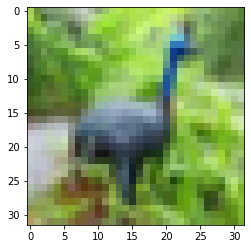

In [37]:
plt.imshow(x_train[6]), y_train[6]

Verificando balanceamento entre as classes

In [38]:
lytr=list(y_train)
#coloque seu código aqui..uma lista com a quantidade de amostras por classe
[lytr.count(i) for i in range(10)]

[5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]

In [39]:
lyts=list(y_test)
#coloque seu código aqui..uma lista com a quantidade de amostras por classe
[lyts.count(i) for i in range(10)]

[1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]

In [0]:
#one-hot encode target column
y_train_enc = tf.keras.utils.to_categorical(y_train)
y_test_enc = tf.keras.utils.to_categorical(y_test)

In [0]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Convolution2D(100,kernel_size=3, activation='relu', input_shape=(32,32,3),use_bias=False))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Convolution2D(100,kernel_size=3, activation='relu',use_bias=False))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Convolution2D(100,kernel_size=3, activation='relu',use_bias=False))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(100, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.005))) #prevent overfitting
model.add(tf.keras.layers.Dropout(0.1)) #prevent overfitting
model.add(tf.keras.layers.Dense(50, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.005))) #prevent overfitting
model.add(tf.keras.layers.Dropout(0.1)) #prevent overfitting
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [59]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 30, 30, 100)       2700      
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 15, 15, 100)       0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 13, 13, 100)       90000     
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 6, 6, 100)         0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 4, 4, 100)         90000     
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 2, 2, 100)         0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 400)             

In [0]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss=tf.keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [61]:
hist=model.fit(x_train, y_train_enc, validation_data=(x_test, y_test_enc), epochs=20)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 11s 215us/sample - loss: 4.4032 - accuracy: 0.3577 - val_loss: 1.8453 - val_accuracy: 0.4954
Epoch 2/20
50000/50000 [==============================] - 10s 201us/sample - loss: 1.6794 - accuracy: 0.4986 - val_loss: 1.5836 - val_accuracy: 0.5031
Epoch 3/20
50000/50000 [==============================] - 10s 200us/sample - loss: 1.4704 - accuracy: 0.5496 - val_loss: 1.3827 - val_accuracy: 0.5814
Epoch 4/20
50000/50000 [==============================] - 10s 199us/sample - loss: 1.3798 - accuracy: 0.5845 - val_loss: 1.2960 - val_accuracy: 0.6176
Epoch 5/20
50000/50000 [==============================] - 10s 201us/sample - loss: 1.3123 - accuracy: 0.6131 - val_loss: 1.3216 - val_accuracy: 0.6096
Epoch 6/20
50000/50000 [==============================] - 10s 200us/sample - loss: 1.2584 - accuracy: 0.6356 - val_loss: 1.2132 - val_accuracy: 0.6487
Epoch 7/20
50000/50000 [====================

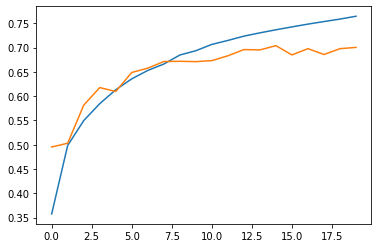

In [64]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.show()

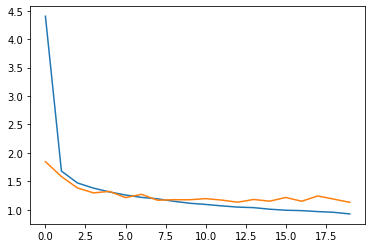

In [65]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.show()

Analise os gráficos do treinamento e testes... o que acha?


In [0]:
# Overfitting
# How to solve?
# Dropout, Regularization (Check by length of input, case too long, there's a possible overfitting caused by variance.),